In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft
from scipy.integrate import quad
from scipy.stats import gamma
from scipy.stats import norm


class GeometricBrownianMotion:
    """Creates an instance of the Geometric Brownian Motion, the standard
    stochastic process used to model the Stock price in the original Black-
    Scholes-Merton Model.

    Parameters / Attributes
    -----------------------
    S0 : float
        The initial stock price.

    r : float
        The continuously compounded risk-free interest rate.
    
    sigma : float
        The volatility parameter.
    """


    def __init__(self, S0, r, sigma):
        self.S0 = S0
        self.r = r
        self.sigma = sigma
    
    
    def phi(self, t, u):
        """Evaluates the characteristic function of log(St), where St is the
        stock price given by a Geometric Brownian motion.

        Parameters
        ----------
        t : array_like(float, ndim=1)
            Time of log-stock price for charateristic function to be computed;
            usually the maturity of the call option.

        u : array_like(float, ndim=1)
            Value at which the characteristic function of log(St) is to be
            computed.

        Returns
        -------
        phi_t(u) : array_like(float, ndim=1)
            Value of characteristic function of log(St) computed at u. 
        """
        S0, r, sigma = self.S0, self.r, self.sigma
        mu = np.log(S0) + (r - 0.5*sigma**2)*t
        var = t*sigma**2
        return np.exp(1j*u*mu  - 0.5*u**2*var)
    

    def sample_path(self, T, N=200, plot=False):
        """Generate a sample path of Geometric Brownian motion and return
        the terminal stock price.

        Parameters
        ----------
        T : float
            Terminal time of stock process.
        
        N : int
            Number of subintervals to use when generating sample path.
        
        plot : bool, optional
            If true, plots and displays the generated sample path.

        Returns
        -------
        ST : float
            The simulated value of the terminal stock price at time T.
        """
        dt = T/N
        t = np.linspace(0, T, N + 1)
        dW = np.random.normal(0, np.sqrt(dt), N)
        W = np.insert(np.cumsum(dW), 0, 0)  

        S0, r, sigma = self.S0, self.r, self.sigma
        S_sim = S0 * np.exp((r - 0.5*sigma**2)*t + sigma*W)
        if plot:
            plt.plot(t, S_sim)
            plt.show()
        return S_sim[-1]

In [4]:


K = 140
S0, r, sigma, T = 100, 0.05, 0.1, 1
sigma, nu, theta = 0.25, 2, -0.1
S = GeometricBrownianMotion(S0, r, sigma)

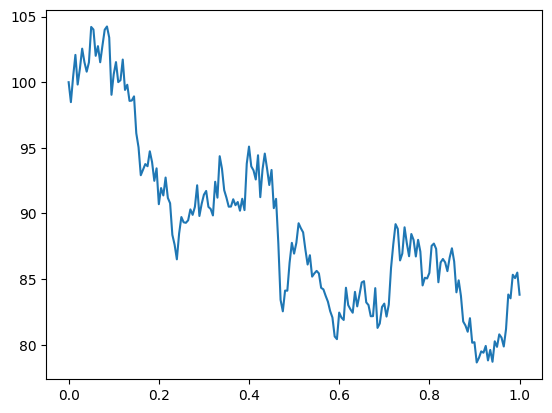

83.80835522339211

In [11]:
S.sample_path(T, plot=True)